#### Обработка данных

In [2]:
import pandas as pd
import numpy as np
import math as m

import plotly.plotly as py
import plotly.graph_objs as go

from scipy import optimize as opt
import scipy
import scipy.odr as odr

from statsmodels.stats.weightstats import *

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data1 = pd.read_csv('data/experiment1.csv') # Считываем данные
data2 = pd.read_csv('data/experiment2.csv')
data3 = pd.read_csv('data/experiment3.csv')

In [4]:
data1

,R2,x
0,63,1.4
1,58,1.8
2,53,2.1
3,48,2.5
4,43,2.9
5,38,3.6
6,33,4.5
7,28,5.7
8,23,7.4
9,18,10.0


In [36]:
data1['I'] = 10**(9)*1.32 * (1.0/2000) * (1.0/(data1['R2']*1000 + 47.5))

In [37]:
data1

,R2,x,I,x/2a
0,63,1.4,10.468298,0.005645
1,58,1.8,11.369999,0.007258
2,53,2.1,12.441680,0.008468
3,48,2.5,13.736407,0.010081
4,43,2.9,15.331901,0.011694
5,38,3.6,17.346738,0.014516
6,33,4.5,19.971253,0.018145
7,28,5.7,23.531509,0.022984
8,23,7.4,28.636512,0.029839
9,18,10.0,36.570162,0.040323


In [38]:
data1['x/2a'] = data1['x']/248

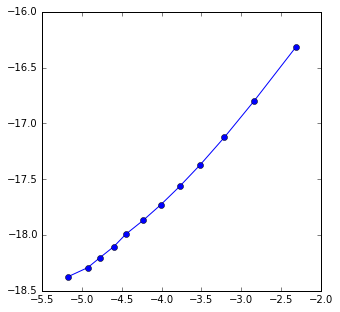

In [13]:
plt.figure(1, figsize=(5,5))
plt.plot(np.log(data1['x/2a']), np.log(data1['I']), marker='o', color='b')
plt.show()

In [14]:
def f(x, a, b):
    return a + b*x

parameters_opt, parameters_cov = opt.curve_fit(f, data1['x/2a'], data1['I']*(10**8), method='dogbox') #, sigma = data['sqr_Al'], absolute_sigma=True)
print("y  = ({:.7f}) + ({:.7f})*x".format(parameters_opt[0], parameters_opt[1]))
print("(+-)({:.7f}) + (+-)({:.7f})*x".format(np.sqrt(np.diag(parameters_cov))[0], np.sqrt(np.diag(parameters_cov))[1]))

y  = (0.5992422) + (76.6662856)*x
(+-)(0.0098429) + (+-)(0.2603094)*x


In [16]:
data2['theta'] = numpy.log(data2['x1'] * np.reciprocal(data2['x2']))

In [17]:
data2

,x1,x2,R,theta
0,15.0,1.9,27.0,2.066196
1,12.5,2.2,31.5,1.737271
2,11.5,2.4,35.0,1.566878
3,10.3,2.5,39.5,1.415853
4,9.1,2.5,44.0,1.291984
5,8.2,2.5,48.5,1.187843
6,7.7,2.5,53.0,1.124930
7,6.2,2.2,63.0,1.036092
8,5.5,2.2,72.0,0.916291
9,5.0,2.3,81.0,0.776529


In [18]:
data2['1/th'] = np.reciprocal(np.square(data2['theta']))

In [96]:
data2['R+R0'] = np.square(data2['R'] + 0.0475)

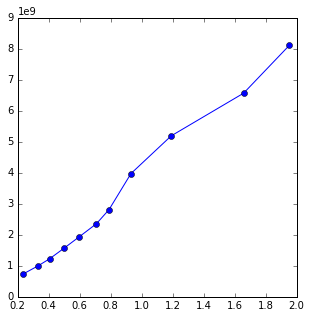

In [20]:
plt.figure(1, figsize=(5,5))
plt.plot(data2['1/th'], data2['R+R0'], marker='o', color='b')
plt.show()

In [27]:
def f(x, a, b):
    return a + b*x

parameters_opt, parameters_cov = opt.curve_fit(f, data2['R+R0'][0:7], data2['1/th'][0:7]*(10**8), method='dogbox') #, sigma = data['sqr_Al'], absolute_sigma=True)
print("y  = ({:.7f}) + ({:.7f})*x".format(parameters_opt[0], parameters_opt[1]))
print("(+-)({:.7f}) + (+-)({:.7f})*x".format(np.sqrt(np.diag(parameters_cov))[0], np.sqrt(np.diag(parameters_cov))[1]))

y  = (6612557.9641528) + (0.0267139)*x
(+-)(2091103.9043220) + (+-)(0.0011607)*x


In [26]:
data2['R+R0'][0:7]

0    7.315673e+08
1    9.952448e+08
2    1.228327e+09
3    1.564005e+09
4    1.940182e+09
5    2.356860e+09
6    2.814037e+09
Name: R+R0, dtype: float64

In [43]:
data3

,R,x
0,50.0,20.8
1,45.0,20.1
2,40.0,19.5
3,35.0,19.0
4,30.0,18.5
5,25.0,17.6
6,20.0,16.5
7,15.0,14.8
8,13.0,13.5
9,11.0,12.9


In [51]:
data3['R+R0'] = numpy.reciprocal(data3['R']*1000 + 47.5)

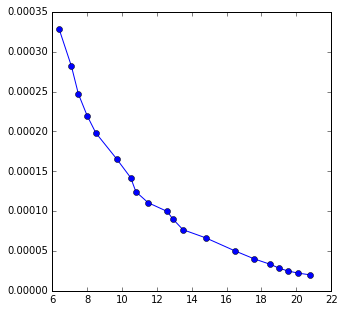

In [52]:
plt.figure(1, figsize=(5,5))
plt.plot(data3['x'], data3['R+R0'], marker='o', color='b')
plt.show()

In [40]:
data1

,R2,x,I,x/2a
0,63,1.4,10.468298,0.005645
1,58,1.8,11.369999,0.007258
2,53,2.1,12.441680,0.008468
3,48,2.5,13.736407,0.010081
4,43,2.9,15.331901,0.011694
5,38,3.6,17.346738,0.014516
6,33,4.5,19.971253,0.018145
7,28,5.7,23.531509,0.022984
8,23,7.4,28.636512,0.029839
9,18,10.0,36.570162,0.040323


In [120]:
data1['errI'] = 0.02*data1['I']
data1['errx/2a'] = data1['x/2a']*(0.4/data1['x'] + 1/124)

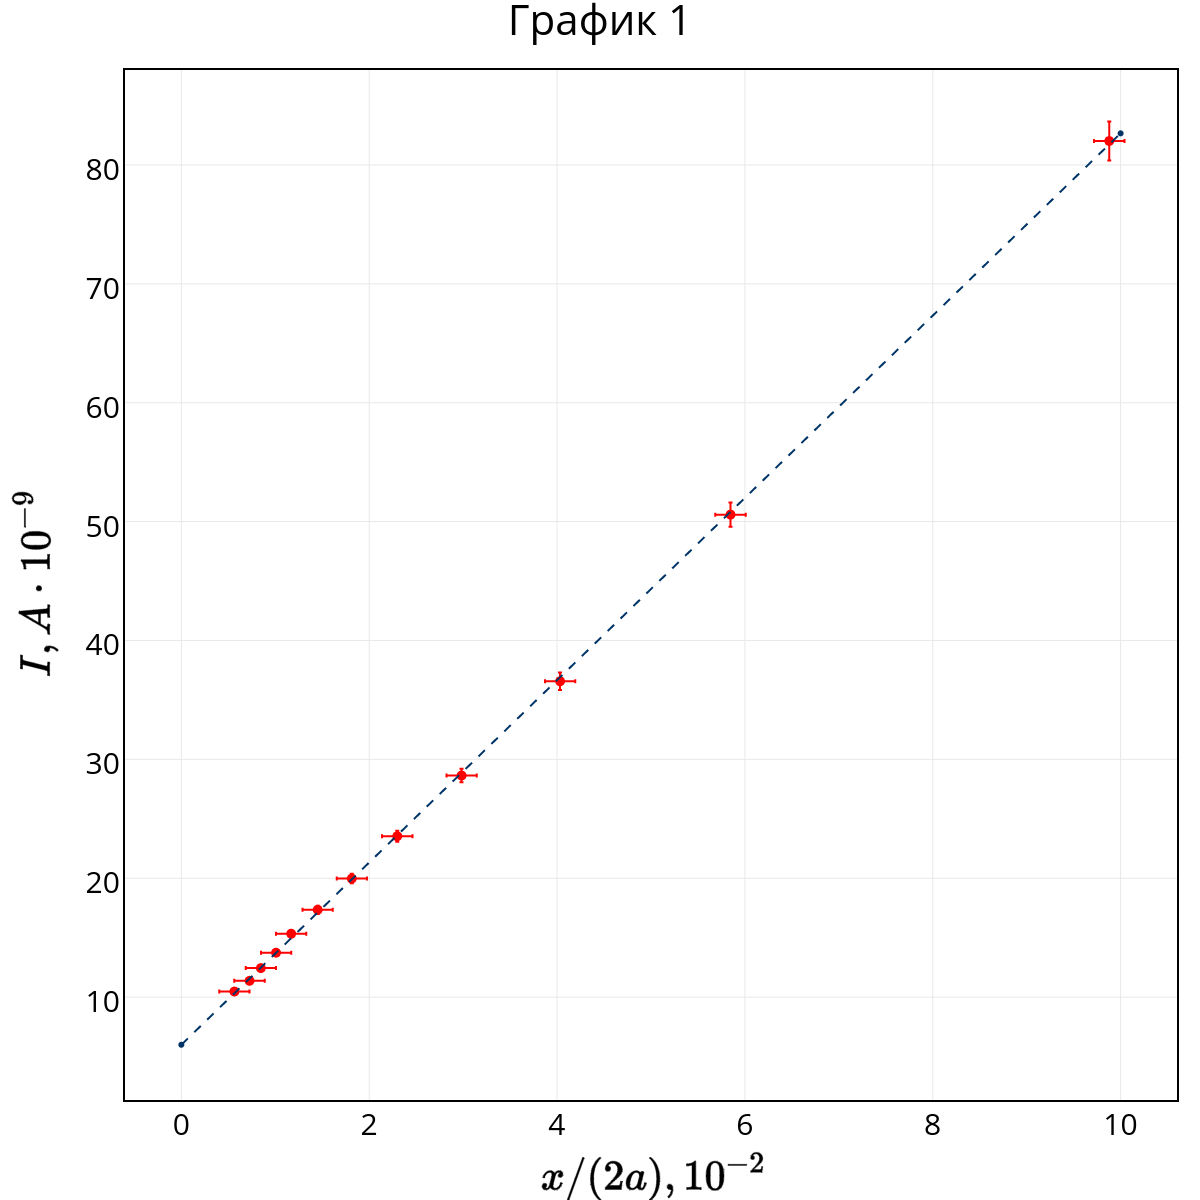

In [226]:
trace1 = go.Scatter(
    y = data1['I'],
    x = data1['x/2a']*100,
    mode = 'markers',
    name = '$I~=~0,3~mA$',
    error_y = dict(
        type = 'data',
        array = data1['errI'],
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'data',
        array = data1['errx/2a']*100,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ff0000'
    ),
)

trace2 = go.Scatter(
    y = [5.9924221, 5.9924221+10*3.0913825*2.48],
    x = [0, 10],
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
)

trace3 = go.Scatter(
    y = [5.9924221+0.0984286, 5.9924221+0.0984286+10*(3.0913825+0.0104963)*2.48],
    x = [0, 10],
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
)

trace4 = go.Scatter(
    y = [5.9924221-0.0984286, 5.9924221-0.0984286+10*(3.0913825-0.0104963)*2.48],
    x = [0, 10],
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
)




trace0 = [trace1, trace2]

layout = go.Layout(
    showlegend=False,
    title = "График 1",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$x/(2a), 10^{-2}$',
        #range = [0.0, 42.0],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$I, A \cdot 10^{-9}$',
        #range = [0, 42],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 125,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(fig, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot1.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot1.png", width=500)

In [119]:
data1

,R2,x,I,x/2a,errI,errx/2a
0,63,1.4,10.468298,0.005645,0.209366,0.000403
1,58,1.8,11.369999,0.007258,0.227400,0.000403
2,53,2.1,12.441680,0.008468,0.248834,0.000403
3,48,2.5,13.736407,0.010081,0.274728,0.000403
4,43,2.9,15.331901,0.011694,0.306638,0.000403
5,38,3.6,17.346738,0.014516,0.346935,0.000403
6,33,4.5,19.971253,0.018145,0.399425,0.000403
7,28,5.7,23.531509,0.022984,0.470630,0.000403
8,23,7.4,28.636512,0.029839,0.572730,0.000403
9,18,10.0,36.570162,0.040323,0.731403,0.000403


In [116]:
def f(x, a, b):
    return a + b*x

parameters_opt, parameters_cov = opt.curve_fit(f, data1['x'], data1['I'], method='dogbox') #, sigma = data['sqr_Al'], absolute_sigma=True)
print("y  = ({:.7f}) + ({:.7f})*x".format(parameters_opt[0], parameters_opt[1]))
print("(+-)({:.7f}) + (+-)({:.7f})*x".format(np.sqrt(np.diag(parameters_cov))[0], np.sqrt(np.diag(parameters_cov))[1]))

y  = (5.9924221) + (3.0913825)*x
(+-)(0.0984286) + (+-)(0.0104963)*x


In [60]:
 data1['x']

0      1.4
1      1.8
2      2.1
3      2.5
4      2.9
5      3.6
6      4.5
7      5.7
8      7.4
9     10.0
10    14.5
11    24.5
Name: x, dtype: float64

In [56]:
data1['I']

0     10.468298
1     11.369999
2     12.441680
3     13.736407
4     15.331901
5     17.346738
6     19.971253
7     23.531509
8     28.636512
9     36.570162
10    50.584403
11    82.013048
Name: I, dtype: float64

In [127]:
data2

,x1,x2,R,theta,1/th,R+R0,x1/x2,errx1/x2,errtheta,err1/th,errR+R0
0,15.0,1.9,27.0,2.066196,0.234238,731.540209,7.894737,1.872576,0.237193,0.053780,0.2
1,12.5,2.2,31.5,1.737271,0.331333,995.213209,5.681818,1.214876,0.213818,0.081559,0.2
2,11.5,2.4,35.0,1.566878,0.407314,1228.292209,4.791667,0.965278,0.201449,0.104735,0.2
3,10.3,2.5,39.5,1.415853,0.498843,1563.965209,4.120000,0.819200,0.198835,0.140110,0.2
4,9.1,2.5,44.0,1.291984,0.599082,1940.138209,3.640000,0.742400,0.203956,0.189145,0.2
5,8.2,2.5,48.5,1.187843,0.708731,2356.811209,3.280000,0.684800,0.208780,0.249139,0.2
6,7.7,2.5,53.0,1.124930,0.790222,2813.984209,3.080000,0.652800,0.211948,0.297772,0.2
7,6.2,2.2,63.0,1.036092,0.931544,3974.924209,2.818182,0.694215,0.246334,0.442955,0.2
8,5.5,2.2,72.0,0.916291,1.191059,5190.770209,2.500000,0.636364,0.254545,0.661752,0.2
9,5.0,2.3,81.0,0.776529,1.658383,6568.616209,2.173913,0.551985,0.253913,1.084532,0.2


In [122]:
data2['x1/x2'] = data2['x1'] * np.reciprocal(data2['x2'])

In [139]:
data2['errx1/x2'] = data2['x1/x2']*(0.1/data2['x1'] + 0.1/data2['x2'] )

In [140]:
data2['theta'] = numpy.log(data2['x1/x2'])
data2['errtheta'] = data2['errx1/x2']/data2['x1/x2']

In [141]:
data2['1/th'] = np.reciprocal(np.square(data2['theta']))
data2['err1/th'] = 2*data2['errtheta']/(data2['theta'])**3

In [142]:
data2['R+R0'] = np.square(data2['R'] + 0.047)
data2['errR+R0'] = 2*0.1/data2['R']*data2['R+R0']

In [143]:
data2

,x1,x2,R,theta,1/th,R+R0,x1/x2,errx1/x2,errtheta,err1/th,errR+R0
0,15.0,1.9,27.0,2.066196,0.234238,731.540209,7.894737,0.468144,0.059298,0.013445,5.418816
1,12.5,2.2,31.5,1.737271,0.331333,995.213209,5.681818,0.303719,0.053455,0.020390,6.318814
2,11.5,2.4,35.0,1.566878,0.407314,1228.292209,4.791667,0.241319,0.050362,0.026184,7.018813
3,10.3,2.5,39.5,1.415853,0.498843,1563.965209,4.120000,0.204800,0.049709,0.035027,7.918811
4,9.1,2.5,44.0,1.291984,0.599082,1940.138209,3.640000,0.185600,0.050989,0.047286,8.818810
5,8.2,2.5,48.5,1.187843,0.708731,2356.811209,3.280000,0.171200,0.052195,0.062285,9.718809
6,7.7,2.5,53.0,1.124930,0.790222,2813.984209,3.080000,0.163200,0.052987,0.074443,10.618808
7,6.2,2.2,63.0,1.036092,0.931544,3974.924209,2.818182,0.173554,0.061584,0.110739,12.618807
8,5.5,2.2,72.0,0.916291,1.191059,5190.770209,2.500000,0.159091,0.063636,0.165438,14.418806
9,5.0,2.3,81.0,0.776529,1.658383,6568.616209,2.173913,0.137996,0.063478,0.271133,16.218805


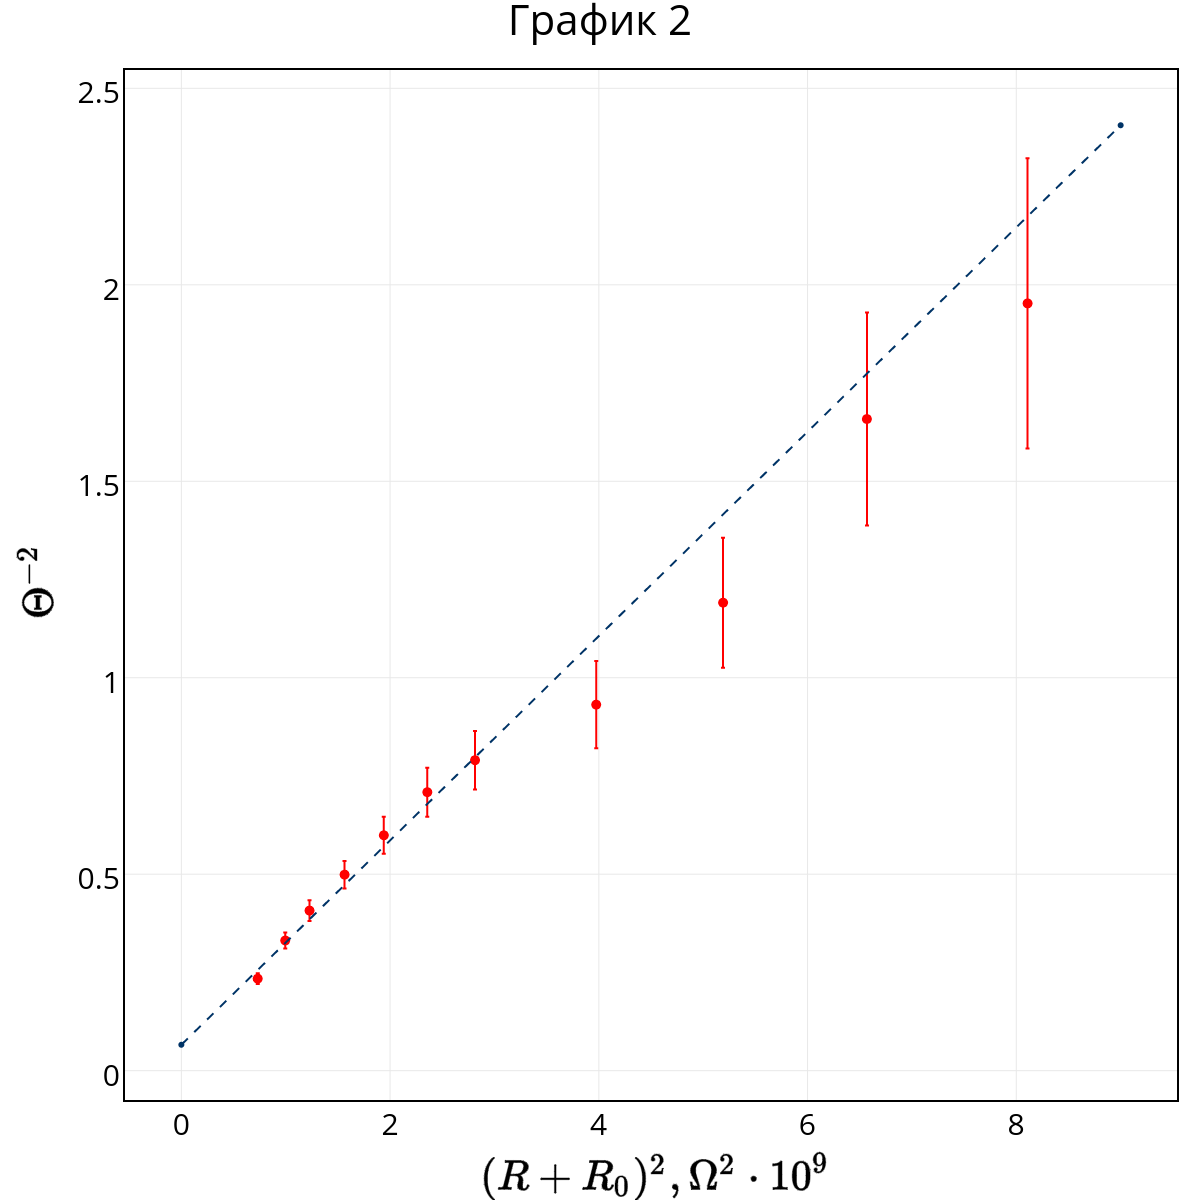

In [225]:
trace1 = go.Scatter(
    y = data2['1/th'],
    x = data2['R+R0']/1000,
    mode = 'markers',
    name = '$I~=~0,3~mA$',
    error_y = dict(
        type = 'data',
        array = data2['err1/th'],
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'data',
        array = data2['errR+R0']/1000,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ff0000'
    ),
)

trace2 = go.Scatter(
    y = [0.066, 0.066+9*0.26],
    x = [0, 9],
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
)

trace0 = [trace1, trace2]

layout = go.Layout(
    showlegend=False,
    title = "График 2",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$(R+R_0)^2, \Omega^2 \cdot 10^{9} $',
        #range = [0.0, 42.0],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\Theta^{-2}$',
        #range = [0, 42],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 125,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(fig, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot2.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot2.png", width=500)

In [149]:
def f(x, a, b):
    return a + b*x

parameters_opt, parameters_cov = opt.curve_fit(f, data2['R+R0'][0:7], data2['1/th'][0:7], method='dogbox') #, sigma = data['sqr_Al'], absolute_sigma=True)
print("y  = ({:.7f}) + ({:.7f})*x".format(parameters_opt[0], parameters_opt[1]))
print("(+-)({:.7f}) + (+-)({:.7f})*x".format(np.sqrt(np.diag(parameters_cov))[0], np.sqrt(np.diag(parameters_cov))[1]))

y  = (0.0661308) + (0.0002671)*x
(+-)(0.0209111) + (+-)(0.0000116)*x


In [114]:
data2

,x1,x2,R,theta,1/th,R+R0,x1/x2,errx1/x2,errtheta,err1/th,errR+R0
0,15.0,1.9,27.0,2.066196,0.483981,7.315673,7.894737,0.468144,0.059298,0.013445,0.146313
1,12.5,2.2,31.5,1.737271,0.575615,9.952448,5.681818,0.303719,0.053455,0.020390,0.199049
2,11.5,2.4,35.0,1.566878,0.638212,12.283273,4.791667,0.241319,0.050362,0.026184,0.245665
3,10.3,2.5,39.5,1.415853,0.706288,15.640048,4.120000,0.204800,0.049709,0.035027,0.312801
4,9.1,2.5,44.0,1.291984,0.774004,19.401823,3.640000,0.185600,0.050989,0.047286,0.388036
5,8.2,2.5,48.5,1.187843,0.841862,23.568598,3.280000,0.171200,0.052195,0.062285,0.471372
6,7.7,2.5,53.0,1.124930,0.888945,28.140373,3.080000,0.163200,0.052987,0.074443,0.562807
7,6.2,2.2,63.0,1.036092,0.965165,39.749873,2.818182,0.173554,0.061584,0.110739,0.794997
8,5.5,2.2,72.0,0.916291,1.091357,51.908423,2.500000,0.159091,0.063636,0.165438,1.038168
9,5.0,2.3,81.0,0.776529,1.287782,65.686973,2.173913,0.137996,0.063478,0.271133,1.313739


In [99]:
def f(x, a, b):
    return a + b*x

parameters_opt, parameters_cov = opt.curve_fit(f, data2['R+R0'][0:7], data2['1/th'][0:7], method='dogbox') #, sigma = data['sqr_Al'], absolute_sigma=True)
print("y  = ({:.7f}) + ({:.7f})*x".format(parameters_opt[0], parameters_opt[1]))
print("(+-)({:.7f}) + (+-)({:.7f})*x".format(np.sqrt(np.diag(parameters_cov))[0], np.sqrt(np.diag(parameters_cov))[1]))

y  = (0.0661256) + (0.0002671)*x
(+-)(0.0209110) + (+-)(0.0000116)*x


In [97]:
data2

,x1,x2,R,theta,1/th,R+R0,x1/x2,errx1/x2,errtheta,err1/th,errR+R0
0,15.0,1.9,27.0,2.066196,0.234238,731.567256,7.894737,0.468144,0.059298,0.013445,0.146313
1,12.5,2.2,31.5,1.737271,0.331333,995.244756,5.681818,0.303719,0.053455,0.020390,0.199049
2,11.5,2.4,35.0,1.566878,0.407314,1228.327256,4.791667,0.241319,0.050362,0.026184,0.245665
3,10.3,2.5,39.5,1.415853,0.498843,1564.004756,4.120000,0.204800,0.049709,0.035027,0.312801
4,9.1,2.5,44.0,1.291984,0.599082,1940.182256,3.640000,0.185600,0.050989,0.047286,0.388036
5,8.2,2.5,48.5,1.187843,0.708731,2356.859756,3.280000,0.171200,0.052195,0.062285,0.471372
6,7.7,2.5,53.0,1.124930,0.790222,2814.037256,3.080000,0.163200,0.052987,0.074443,0.562807
7,6.2,2.2,63.0,1.036092,0.931544,3974.987256,2.818182,0.173554,0.061584,0.110739,0.794997
8,5.5,2.2,72.0,0.916291,1.191059,5190.842256,2.500000,0.159091,0.063636,0.165438,1.038168
9,5.0,2.3,81.0,0.776529,1.658383,6568.697256,2.173913,0.137996,0.063478,0.271133,1.313739


In [152]:
data3

,R,x,R+R0
0,50.0,20.8,0.019981
1,45.0,20.1,0.022199
2,40.0,19.5,0.024971
3,35.0,19.0,0.028533
4,30.0,18.5,0.033281
5,25.0,17.6,0.039925
6,20.0,16.5,0.049883
7,15.0,14.8,0.066458
8,13.0,13.5,0.076646
9,11.0,12.9,0.090522


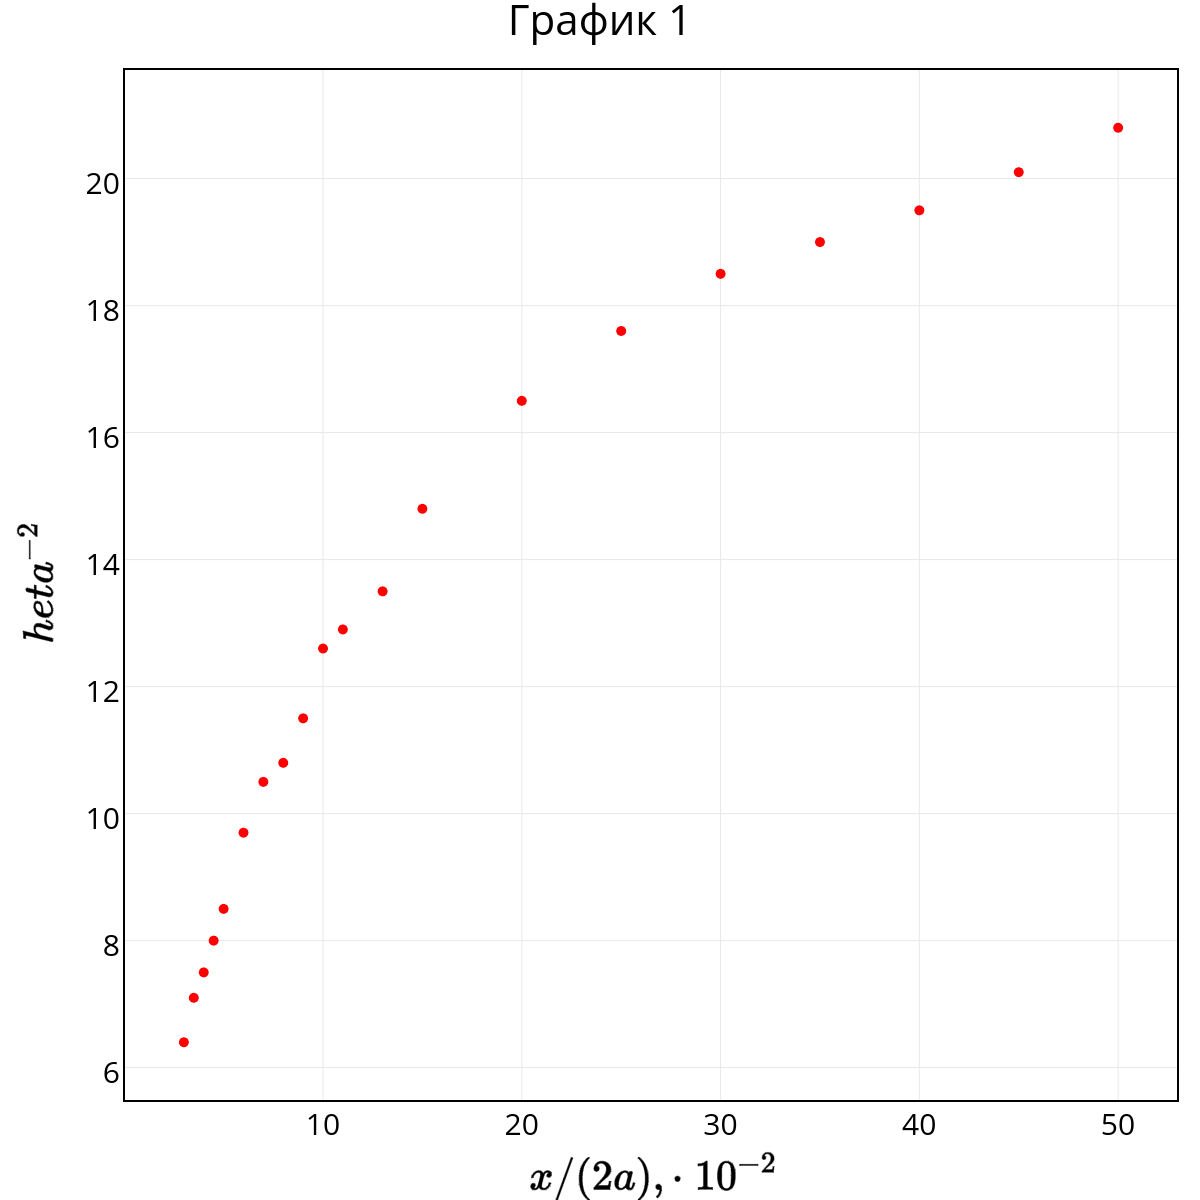

In [109]:
trace1 = go.Scatter(
    y = data3['x'],
    x = data3['R'],
    mode = 'markers',
    name = '$I~=~0,3~mA$',
    
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ff0000'
    ),
)

trace2 = go.Scatter(
    y = [5.9924221, 5.9924221+10*3.0913825*2.48],
    x = [0, 10],
    line = dict(
        color = ('#f4b042'),
        width = 2,
        dash = 'dash'),
)

trace3 = go.Scatter(
    y = [5.9924221+0.0984286, 5.9924221+0.0984286+10*(3.0913825+0.0104963)*2.48],
    x = [0, 10],
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
)

trace4 = go.Scatter(
    y = [5.9924221-0.0984286, 5.9924221-0.0984286+10*(3.0913825-0.0104963)*2.48],
    x = [0, 10],
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
)




trace0 = [trace1]#, trace2]

layout = go.Layout(
    showlegend=False,
    title = "График 1",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$x/(2a), \cdot~10^{-2}$',
        #range = [0.0, 42.0],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\theta^{-2}$',
        #range = [0, 42],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 125,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(fig, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot1.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot1.png", width=500)

In [153]:
data3['R+R0'] = numpy.reciprocal(data3['R'] + 0.047)

In [229]:
data3['x'] = data3['x'] - 2

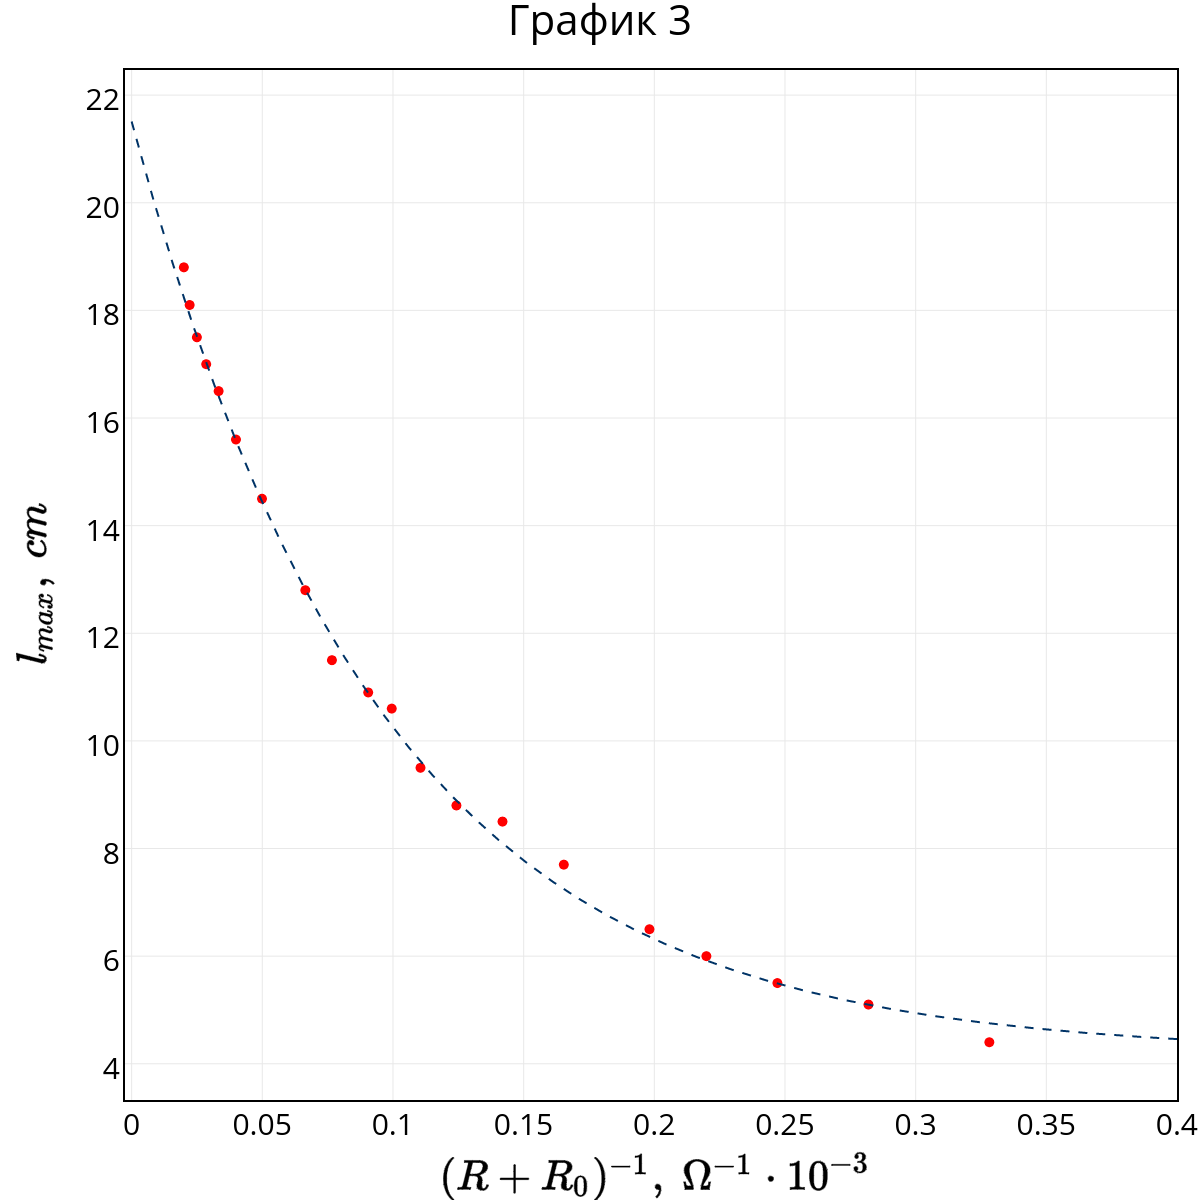

In [236]:
trace1 = go.Scatter(
    y = data3['x'],
    x = data3['R+R0'],
    mode = 'markers',
    name = '$I~=~0,3~mA$',
    
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ff0000'
    ),
)

trace2 = go.Scatter(
    y = y_sp,
    x = x_sp,
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
)

trace0 = [trace1, trace2]

layout = go.Layout(
    showlegend=False,
    title = "График 3",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$(R+R_0)^{-1},~\Omega^{-1} \cdot 10^{-3} $',
        #range = [0.0, 42.0],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$l_{max},~cm$',
        #range = [0, 42],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 125,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(fig, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot3.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot3.png", width=500)

In [232]:
def f(x, a, b, c):
    return a + 2.71**(c + b*x)

parameters_opt, parameters_cov = opt.curve_fit(f, data3['R+R0'], data3['x']) #, sigma = data['sqr_Al'], absolute_sigma=True)
print("y  = ({:.7f}) + ({:.7f})*x".format(parameters_opt[0], parameters_opt[1]))
print("(+-)({:.7f}) + (+-)({:.7f})*x".format(np.sqrt(np.diag(parameters_cov))[0], np.sqrt(np.diag(parameters_cov))[1]))

y  = (4.2092916) + (-10.5444442)*x
(+-)(0.2171227) + (+-)(0.4280460)*x


In [233]:
parameters_opt

array([  4.2092916 , -10.54444417,   2.86830943])

In [211]:
parameters_cov

array([[  4.71450942e-02,  -8.17750708e-02,  -1.08803679e-03],
       [ -8.17750708e-02,   1.83218625e-01,   7.62701493e-05],
       [ -1.08803679e-03,   7.62701493e-05,   1.49341111e-04]])

In [181]:
data3

,R,x,R+R0
0,50.0,22.8,0.019981
1,45.0,22.1,0.022199
2,40.0,21.5,0.024971
3,35.0,21.0,0.028533
4,30.0,20.5,0.033281
5,25.0,19.6,0.039925
6,20.0,18.5,0.049883
7,15.0,16.8,0.066458
8,13.0,15.5,0.076646
9,11.0,14.9,0.090522


In [235]:
x_sp = np.linspace(0, 0.4, 1000)
y_sp = 4.2 + 2.71**(2.86-10.54*(x_sp))

In [222]:
y_sp

array([ 23.50980486,  23.43712957,  23.36475941,  23.29269309,
        23.22092934,  23.1494669 ,  23.07830449,  23.00744085,
        22.93687474,  22.8666049 ,  22.79663009,  22.72694906,
        22.6575606 ,  22.58846346,  22.51965642,  22.45113827,
        22.3829078 ,  22.31496379,  22.24730505,  22.17993037,
        22.11283856,  22.04602844,  21.97949882,  21.91324853,
        21.84727638,  21.78158123,  21.71616189,  21.65101722,
        21.58614606,  21.52154725,  21.45721967,  21.39316217,
        21.32937361,  21.26585287,  21.20259882,  21.13961035,
        21.07688633,  21.01442566,  20.95222723,  20.89028994,
        20.82861269,  20.7671944 ,  20.70603397,  20.64513032,
        20.58448238,  20.52408907,  20.46394932,  20.40406207,
        20.34442625,  20.28504082,  20.22590471,  20.16701689,
        20.10837631,  20.04998193,  19.99183272,  19.93392765,
        19.8762657 ,  19.81884584,  19.76166706,  19.70472834,
        19.64802868,  19.59156707,  19.53534252,  19.47

In [216]:
6.2 + 2.71**(2.86-10.54

8.2

In [230]:
data3

,R,x,R+R0
0,50.0,18.8,0.019981
1,45.0,18.1,0.022199
2,40.0,17.5,0.024971
3,35.0,17.0,0.028533
4,30.0,16.5,0.033281
5,25.0,15.6,0.039925
6,20.0,14.5,0.049883
7,15.0,12.8,0.066458
8,13.0,11.5,0.076646
9,11.0,10.9,0.090522


In [237]:
4.2 + 2.71**(2.86-10.54*7.35)

4.2

In [238]:
np.sqrt(parameters_cov)

array([[ 0.21712269,         nan,         nan],
       [        nan,  0.42804602,  0.00871966],
       [        nan,  0.00871966,  0.01222051]])